In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset.
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv")

In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


# Exploratory Data Analysis

In [4]:
# Checking the dimensions of the dataset.
df.shape

(8425, 23)

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# Checking types of columns
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
missing_values = df.isnull().sum()
(missing_values/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           0.890208
MaxTemp           0.712166
Rainfall          2.848665
Evaporation      41.685460
Sunshine         47.406528
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
WindSpeed9am      0.902077
WindSpeed3pm      1.270030
Humidity9am       0.700297
Humidity3pm       1.210682
Pressure9am      15.537092
Pressure3pm      15.572700
Cloud9am         28.735905
Cloud3pm         29.139466
Temp9am           0.664688
Temp3pm           1.139466
RainToday         2.848665
RainTomorrow      2.836795
dtype: float64

In [10]:
impo_elem = df.select_dtypes(include=['object']).columns

print(impo_elem)

for i in impo_elem:
    df[i] = df[i].fillna(df[i].mode()[0])

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [11]:
cont_elem = df.select_dtypes(include=['float']).columns

print(cont_elem)

for i in cont_elem:
    df[i] = df[i].fillna(df[i].mean())

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [12]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [14]:
df.duplicated().sum()

1663

In [15]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,5,12,2008


In [16]:
#Converting the datatype for newly created features

df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

<Axes: >

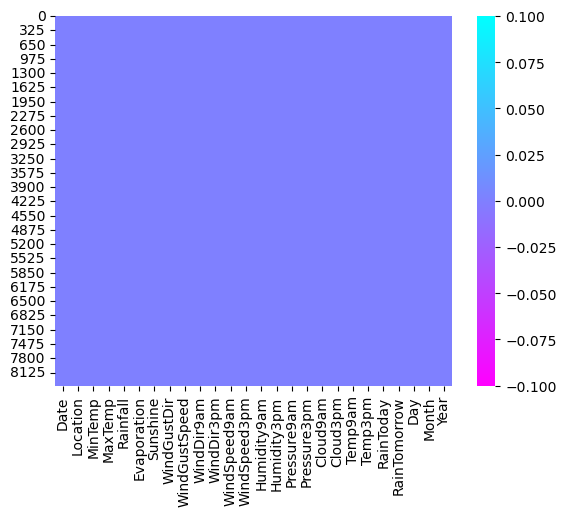

In [17]:
# Now visualize using heatmap.
sns.heatmap(df.isnull(), cmap = "cool_r")

In [18]:
# Checking value count for each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Date
2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: count, Length: 3004, dtype: int64


Location
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: count, dtype: int64


MinTemp
 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
-1.100000      1
 1.400000      1
-1.400000      1
-1.700000      1
 26.000000     1
Name: count, Length: 286, dtype: int64


MaxTemp
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
8.2      1
10.3     1
39.7     1
9.4      1
43.5     1
Name: count, Length: 332, dtype: int64


Rainfall
0.000000      5299
0.200000       406
2.805913       240
0.400000       1

# Description of Dataset

In [19]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,8425,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,2012-08-05 10:18:43.798219520,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,15.741958,6.442136,2012.102433
min,2008-12-01 00:00:00,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,2010-07-13 00:00:00,9.300000,19.300000,0.000000,4.000000,7.632205,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000,8.000000,3.000000,2010.000000
50%,2011-12-24 00:00:00,13.200000,23.300000,0.000000,5.389395,7.632205,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.000000,16.000000,6.000000,2011.000000
75%,2014-09-11 00:00:00,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000,23.000000,9.000000,2014.000000
max,2017-06-25 00:00:00,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000
std,NaN,5.379488,6.114516,10.309308,3.852004,2.825451,13.776101,10.128579,9.704759,16.774231,18.311894,6.275759,6.217451,2.429205,2.299419,5.608301,5.945849,8.787354,3.437994,2.473137


We can see that the maximum temperature is 45 degrees while average max temperature is 23 degrees. And minimum temperature is maximum 28 degrees while minimum is -2 degrees and average minimum temperature is 13 degrees. Also maximum rainfall is 371 mm and average rainfall is 2 mm. Based on the description we see that skewness is there. Also difference between max and 75% is there denoting presence of outliers.

# Data Visualization

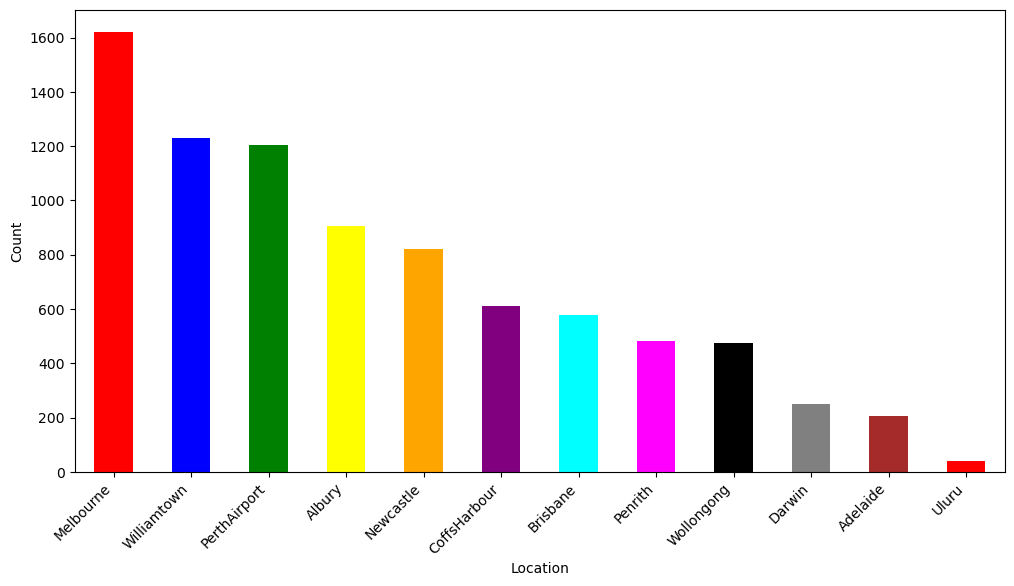

In [26]:
# Plot distribution of countries
plt.figure(figsize=(12, 6))
df['Location'].value_counts().plot(kind='bar',color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'black', 'gray', 'brown'])

plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

Maximum is seen in melbourne followed by Williamtown and PerthAirport. Very less in Uluru.

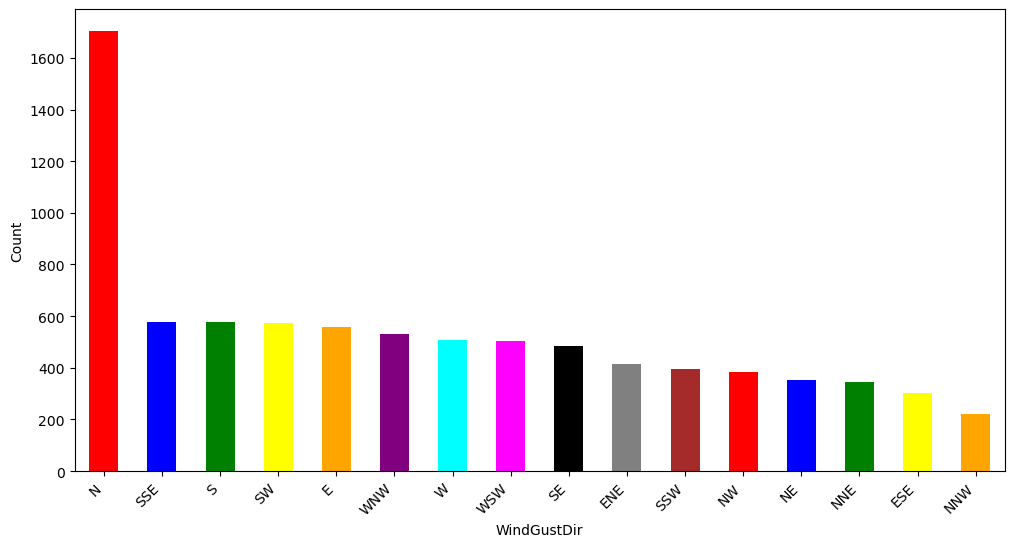

In [27]:
# Plot distribution of WindGustDir
plt.figure(figsize=(12, 6))
df['WindGustDir'].value_counts().plot(kind='bar',color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'black', 'gray', 'brown'])

plt.xlabel('WindGustDir')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

Maximum WindGustDir is seen in North followed by SSE AND S. Very less in NNW.

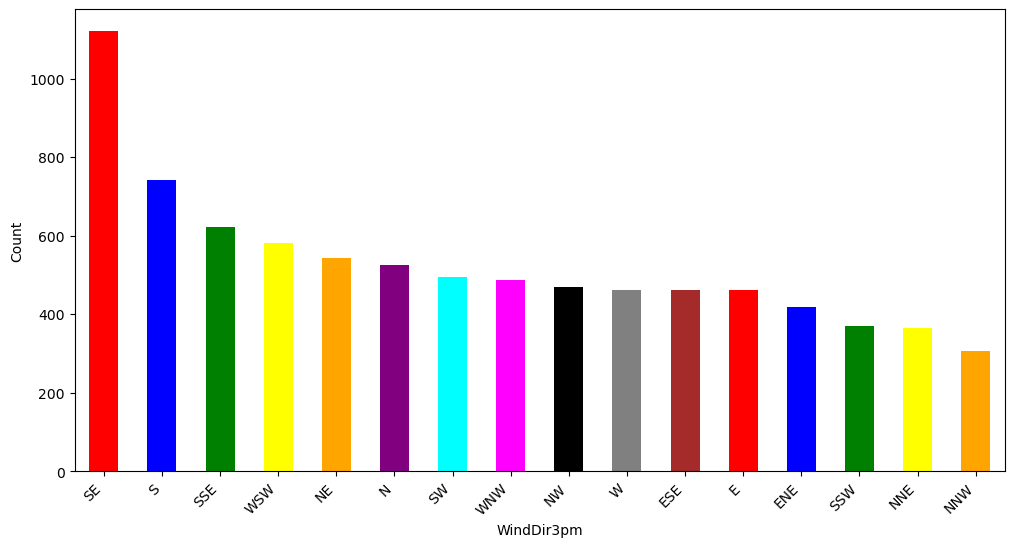

In [28]:
# Plot distribution of WindDir3pm
plt.figure(figsize=(12, 6))
df['WindDir3pm'].value_counts().plot(kind='bar',color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'black', 'gray', 'brown'])

plt.xlabel('WindDir3pm')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

In South East there is maximum WindDir speed at 3 pm.

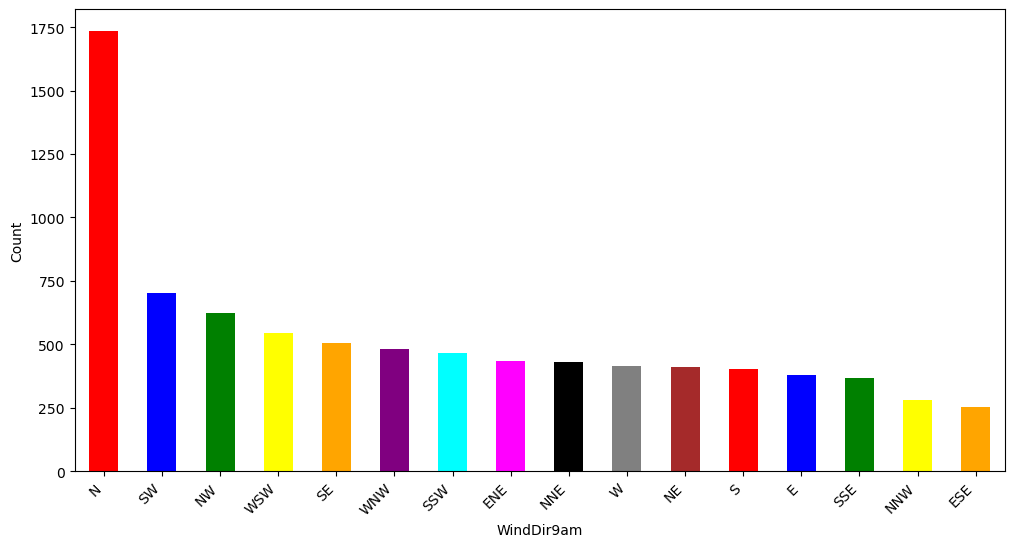

In [29]:
# Plot distribution of WindDir9am
plt.figure(figsize=(12, 6))
df['WindDir9am'].value_counts().plot(kind='bar',color = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'cyan', 'magenta', 'black', 'gray', 'brown'])

plt.xlabel('WindDir9am')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

In North maximum WindDir at 9 am is seen.

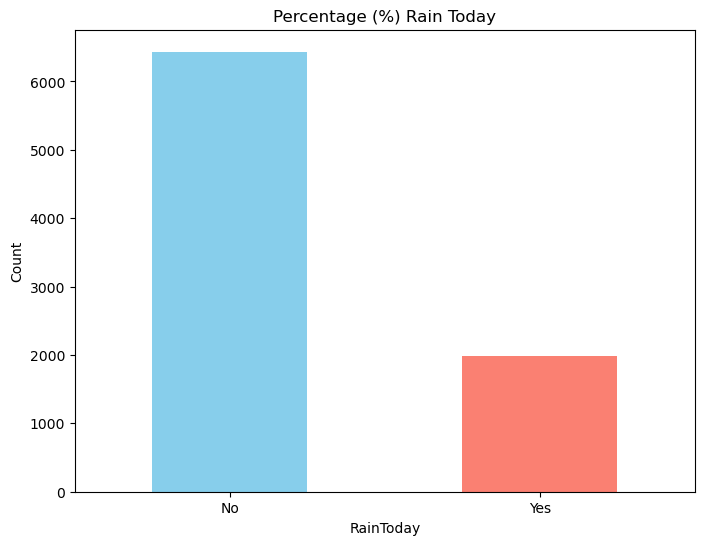

In [30]:
# Plotting %Rain Today
plt.figure(figsize=(8, 6))
df['RainToday'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage (%) Rain Today')
plt.xlabel('RainToday')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

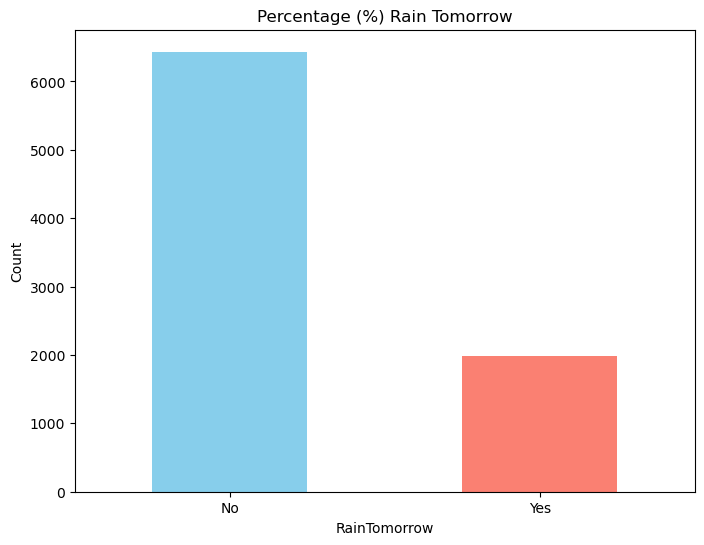

In [31]:
# Plotting %Rain Tomorrow
plt.figure(figsize=(8, 6))
df['RainTomorrow'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Percentage (%) Rain Tomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

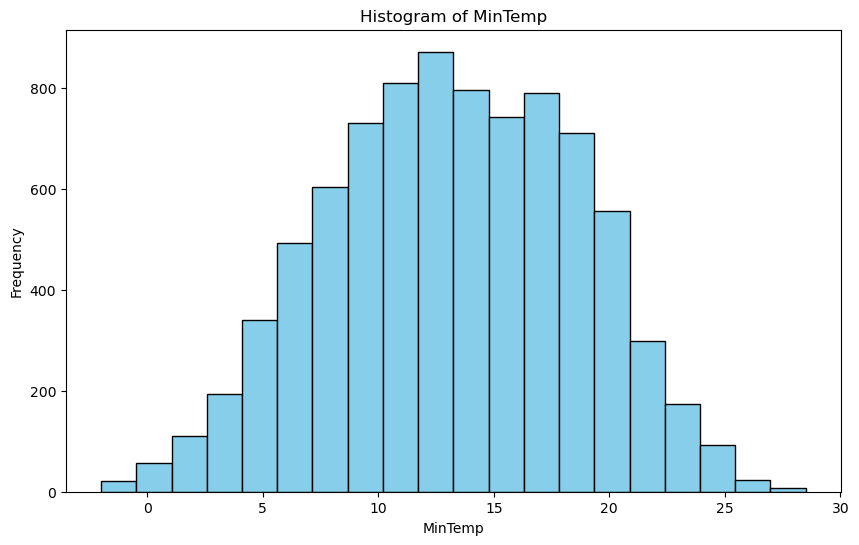

In [32]:
# Plotting histogram for MinTemp
plt.figure(figsize=(10, 6))
plt.hist(df['MinTemp'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of MinTemp')
plt.xlabel('MinTemp')
plt.ylabel('Frequency')
plt.show()

Distribution looks normal and the temperature range lies between 10-20 degrees.

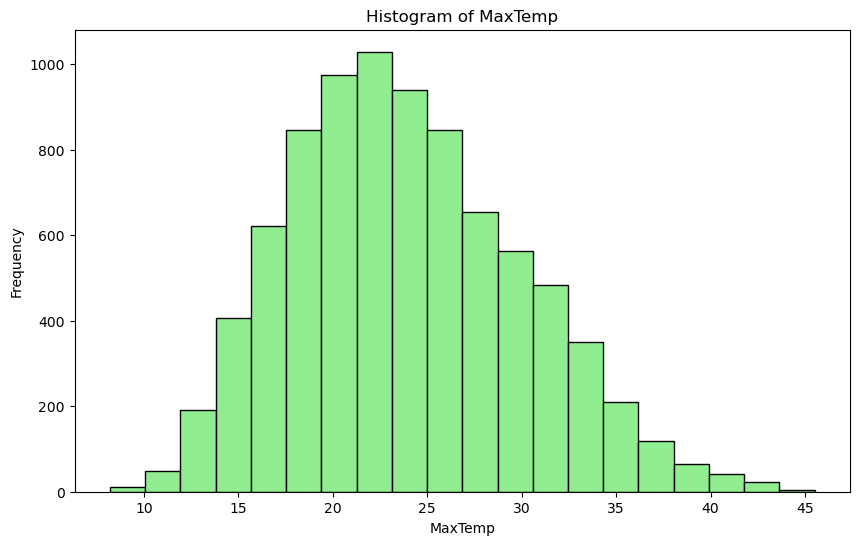

In [33]:
# Plotting histogram for MaxTemp
plt.figure(figsize=(10, 6))
plt.hist(df['MaxTemp'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of MaxTemp')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.show()

Distribution looks nice and maximum ranges between 15-30 degrees.

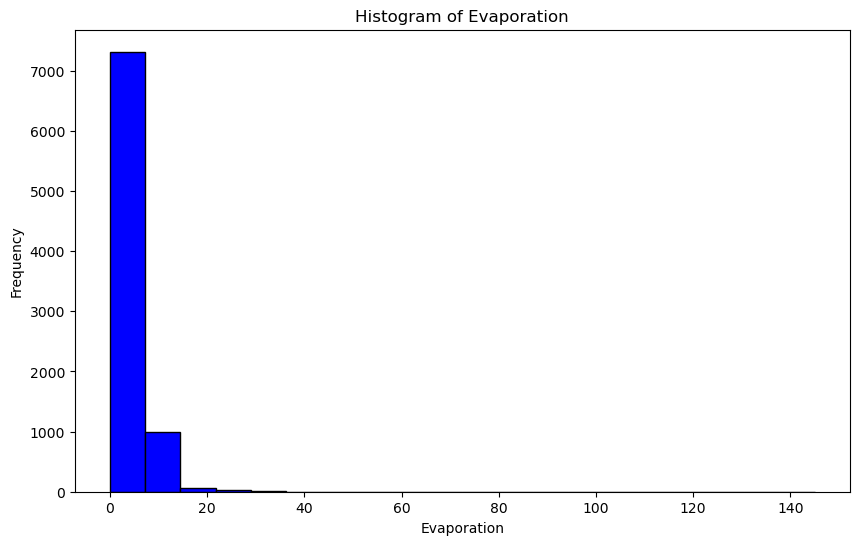

In [34]:
# Plotting histogram for Evaporation
plt.figure(figsize=(10, 6))
plt.hist(df['Evaporation'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Evaporation')
plt.xlabel('Evaporation')
plt.ylabel('Frequency')
plt.show()

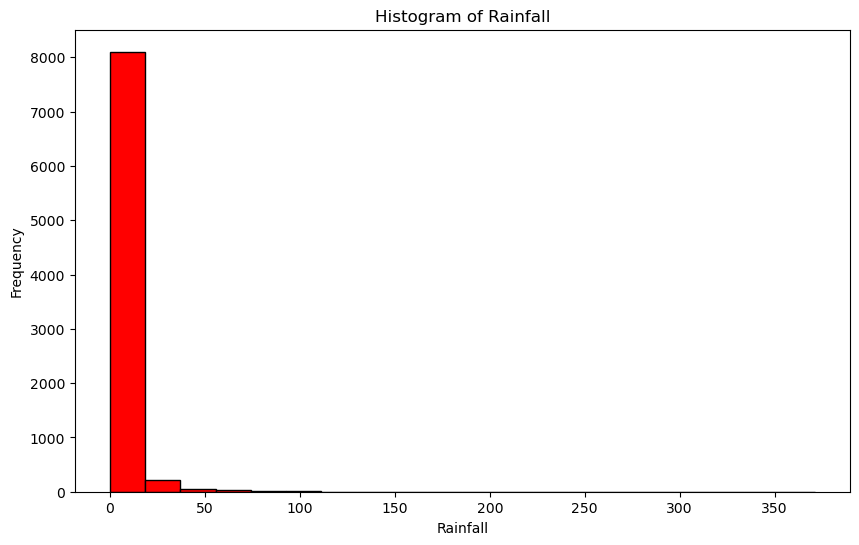

In [35]:
# Plotting histogram for Rainfall
plt.figure(figsize=(10, 6))
plt.hist(df['Rainfall'], bins=20, color='red', edgecolor='black')
plt.title('Histogram of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()

From the above two plots of evaporation and rainfall, we can see that the distribution is not normal. Skewness is there. 

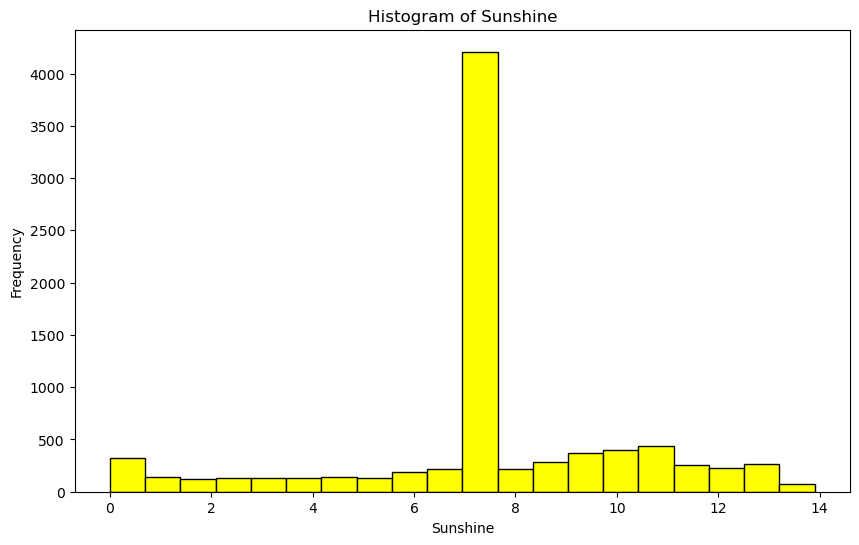

In [36]:
# Plotting histogram for Sunshine
plt.figure(figsize=(10, 6))
plt.hist(df['Sunshine'], bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Sunshine')
plt.xlabel('Sunshine')
plt.ylabel('Frequency')
plt.show()

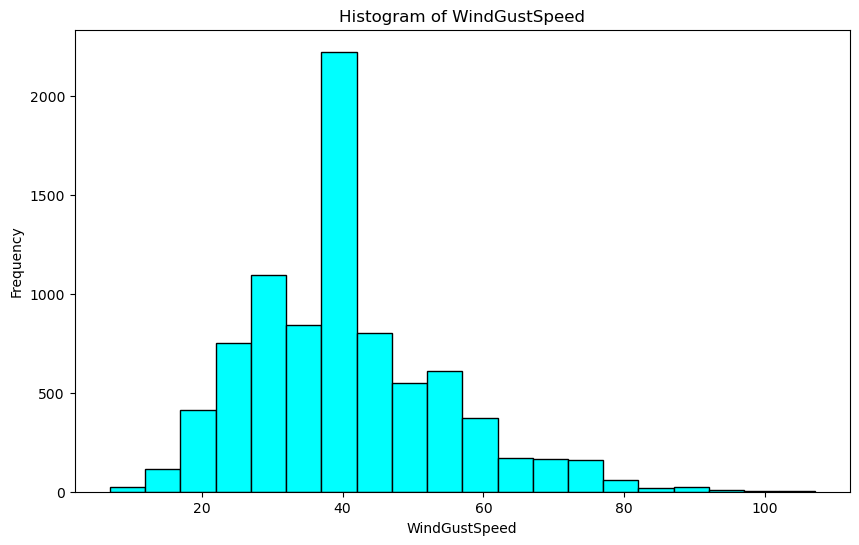

In [37]:
# Plotting histogram for WindGustSpeed
plt.figure(figsize=(10, 6))
plt.hist(df['WindGustSpeed'], bins=20, color='cyan', edgecolor='black')
plt.title('Histogram of WindGustSpeed')
plt.xlabel('WindGustSpeed')
plt.ylabel('Frequency')
plt.show()

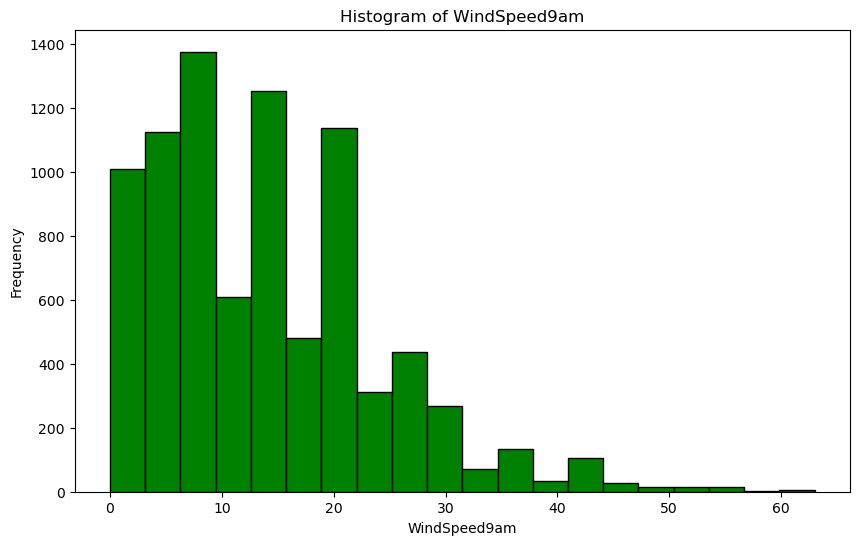

In [38]:
# Plotting histogram for WindSpeed9am
plt.figure(figsize=(10, 6))
plt.hist(df['WindSpeed9am'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of WindSpeed9am')
plt.xlabel('WindSpeed9am')
plt.ylabel('Frequency')
plt.show()

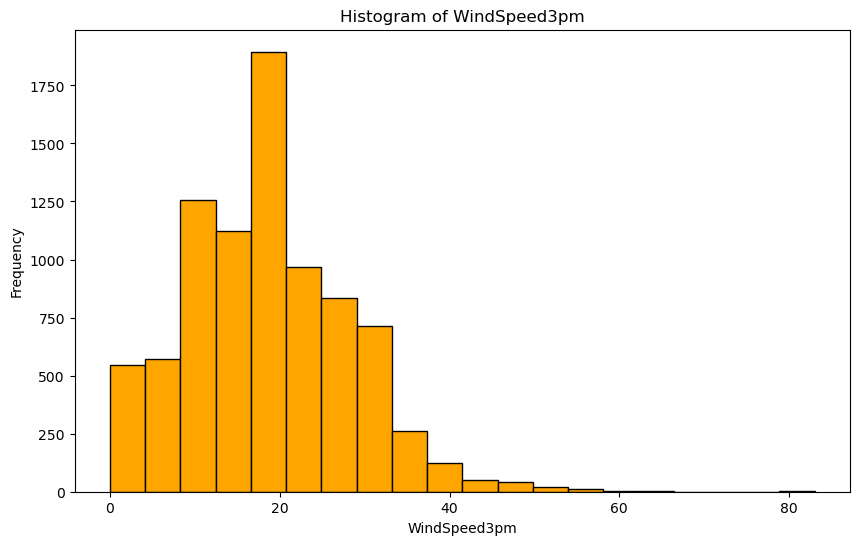

In [39]:
# Plotting histogram for WindSpeed3pm
plt.figure(figsize=(10, 6))
plt.hist(df['WindSpeed3pm'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of WindSpeed3pm')
plt.xlabel('WindSpeed3pm')
plt.ylabel('Frequency')
plt.show()

Both WindSpeed 9am and 3pm has the same trend. We will create a new Column for Avg Windspeed by concatenating the two columns.

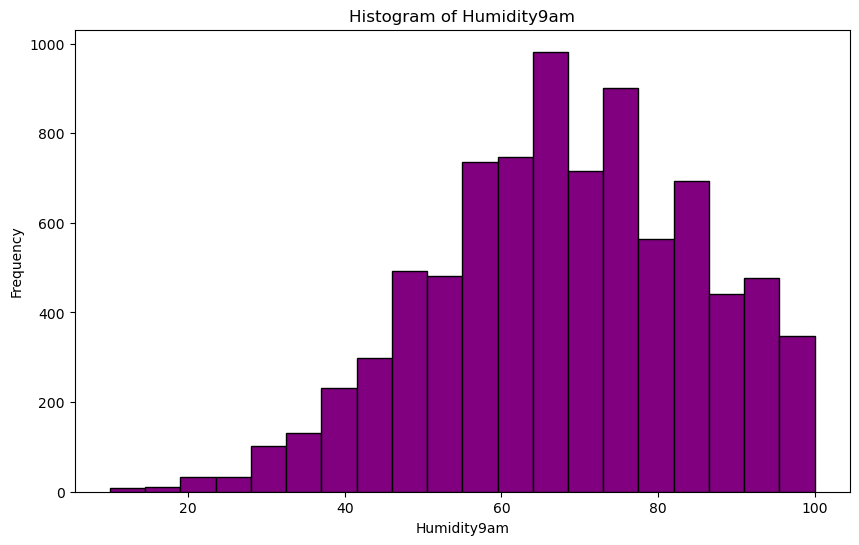

In [40]:
# Plotting histogram for Humidity9am
plt.figure(figsize=(10, 6))
plt.hist(df['Humidity9am'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of Humidity9am')
plt.xlabel('Humidity9am')
plt.ylabel('Frequency')
plt.show()

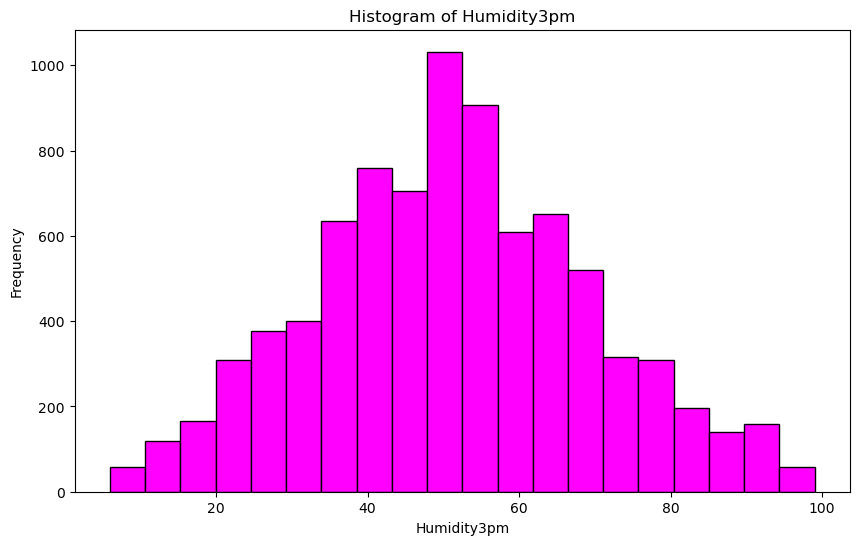

In [41]:
# Plotting histogram for Humidity3pm
plt.figure(figsize=(10, 6))
plt.hist(df['Humidity3pm'], bins=20, color='magenta', edgecolor='black')
plt.title('Histogram of Humidity3pm')
plt.xlabel('Humidity3pm')
plt.ylabel('Frequency')
plt.show()

Both Humidity 9am and 3pm has nearly the same trend. We will create a new Column for Avg Humidity by concatenating the two columns.

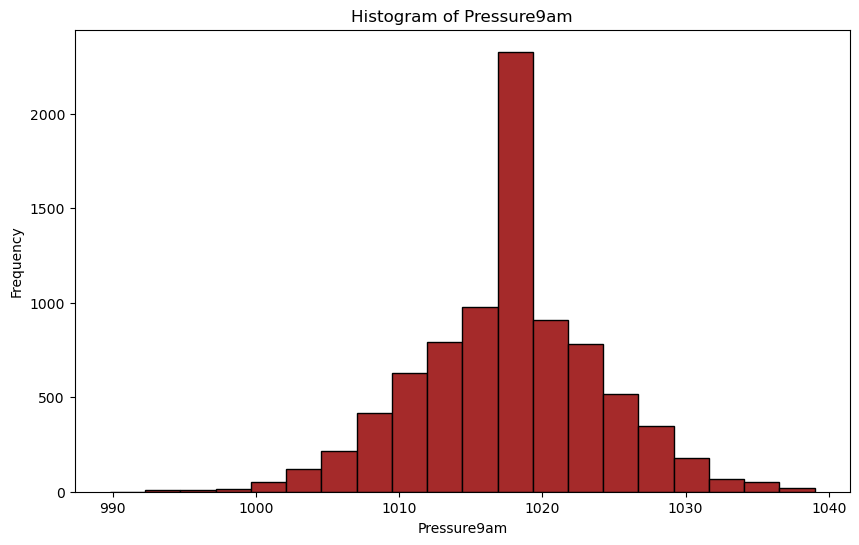

In [43]:
# Plotting histogram for Pressure9am
plt.figure(figsize=(10, 6))
plt.hist(df['Pressure9am'], bins=20, color='brown', edgecolor='black')
plt.title('Histogram of Pressure9am')
plt.xlabel('Pressure9am')
plt.ylabel('Frequency')
plt.show()

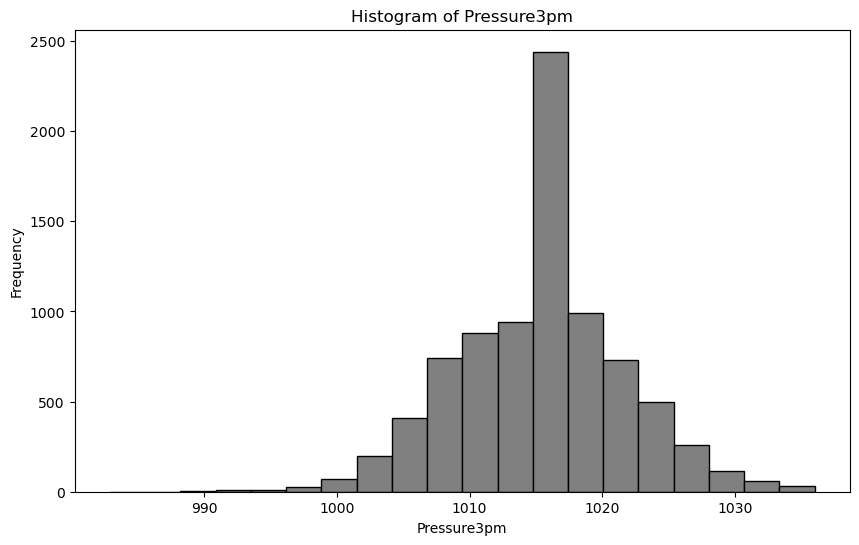

In [44]:
# Plotting histogram for Pressure3pm
plt.figure(figsize=(10, 6))
plt.hist(df['Pressure3pm'], bins=20, color='gray', edgecolor='black')
plt.title('Histogram of Pressure3pm')
plt.xlabel('Pressure3pm')
plt.ylabel('Frequency')
plt.show()

Both Pressure 9am and 3pm shares the same trend. We will create a new Column for Avg Pressure by concatenating the two columns.

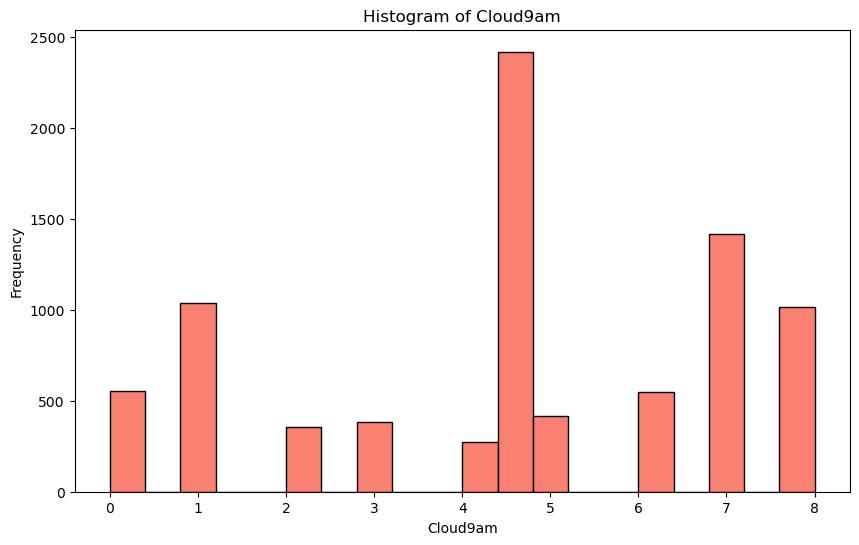

In [45]:
# Plotting histogram for Cloud9am
plt.figure(figsize=(10, 6))
plt.hist(df['Cloud9am'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Cloud9am')
plt.xlabel('Cloud9am')
plt.ylabel('Frequency')
plt.show()

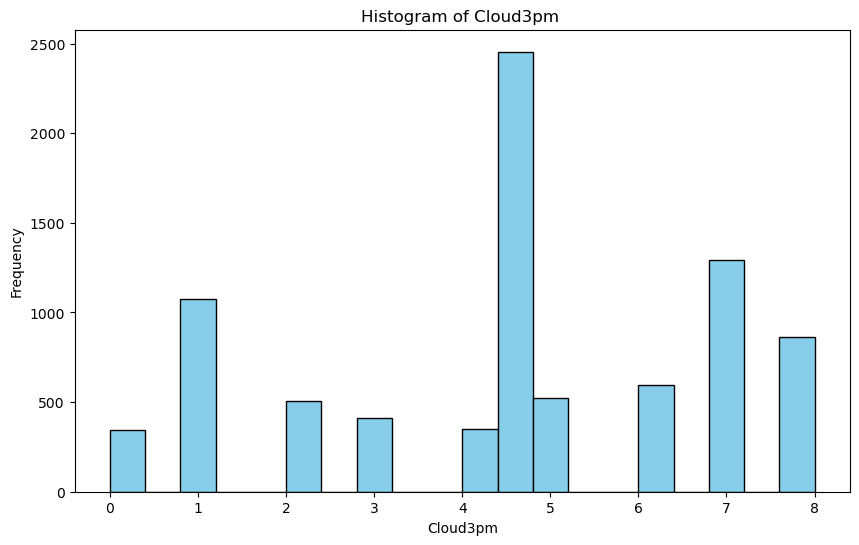

In [46]:
# Plotting histogram for Cloud3pm
plt.figure(figsize=(10, 6))
plt.hist(df['Cloud3pm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Cloud3pm ')
plt.xlabel('Cloud3pm')
plt.ylabel('Frequency')
plt.show()

Both Cloud 9am and 3pm also has the same trend. We will create a new Column for Avg Cloud by concatenating the two columns.

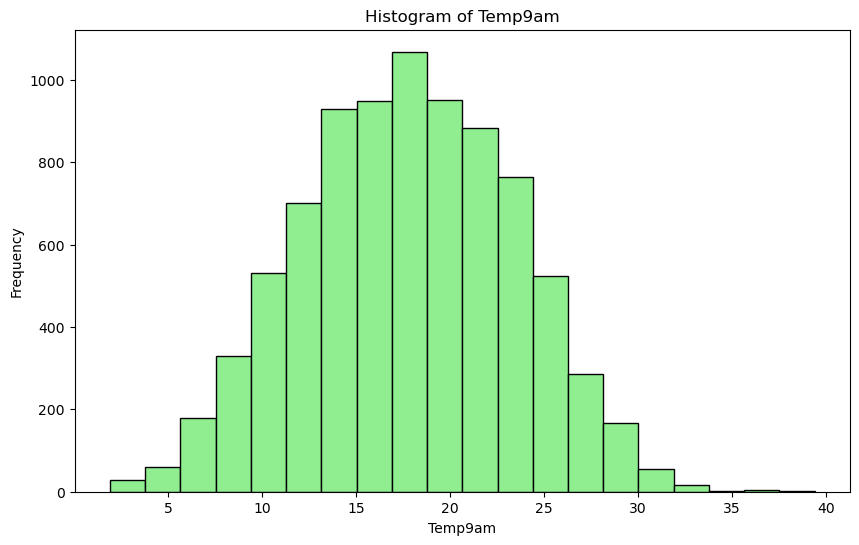

In [48]:
# Plotting histogram for Temp9am
plt.figure(figsize=(10, 6))
plt.hist(df['Temp9am'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Temp9am')
plt.xlabel('Temp9am')
plt.ylabel('Frequency')
plt.show()

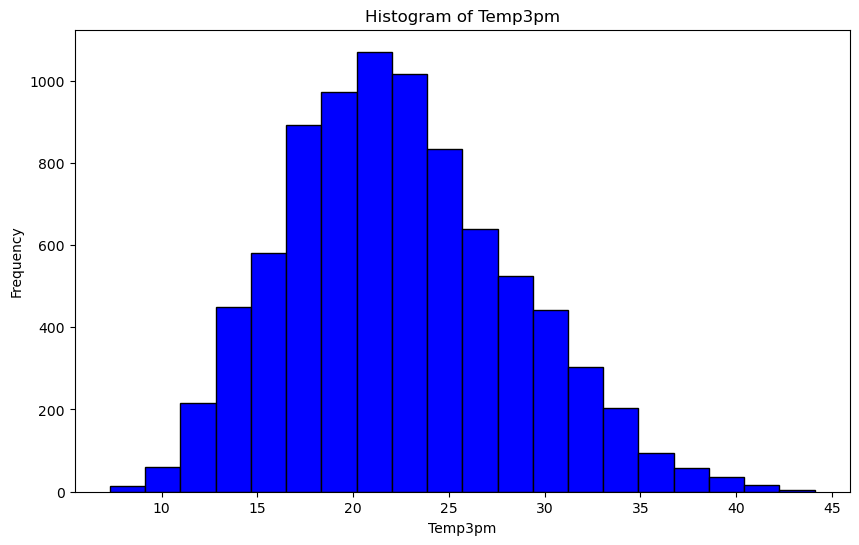

In [49]:
# Plotting histogram for Temp3pm
plt.figure(figsize=(10, 6))
plt.hist(df['Temp3pm'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Temp3pm')
plt.xlabel('Temp3pm')
plt.ylabel('Frequency')
plt.show()

Both Temp 9am and 3pm shares the same trend too. We will create a new Column for Avg Temp by concatenating these two columns.

In [50]:
df['Avg_WindSpeed']=(df['WindSpeed9am']+df['WindSpeed3pm'])/2

df['Avg_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2

df['Avg_Cloud']=(df['Cloud9am']+df['Cloud3pm'])/2

df['Avg_Temp'] = (df['Temp9am']+df['Temp3pm'])/2

df['Avg_Pressure']=(df['Pressure9am']+df['Pressure3pm'])/2

In [52]:
df = df.drop(columns = ['Date', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm'], axis=1)

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,WNW,No,No,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,No,No,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,WSW,No,No,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,E,No,No,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,NW,No,No,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


<Axes: xlabel='Avg_WindSpeed', ylabel='Density'>

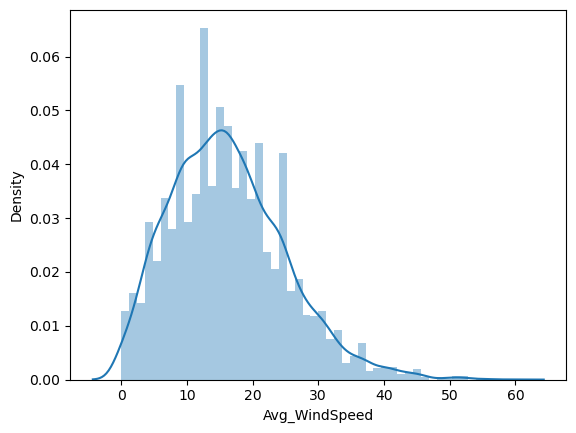

In [54]:
sns.distplot(df['Avg_WindSpeed'])

<Axes: xlabel='Avg_Cloud', ylabel='Density'>

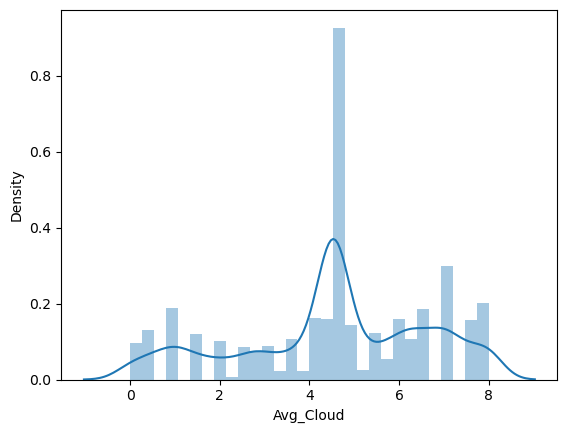

In [55]:
sns.distplot(df['Avg_Cloud'])

<Axes: xlabel='Avg_Humidity', ylabel='Density'>

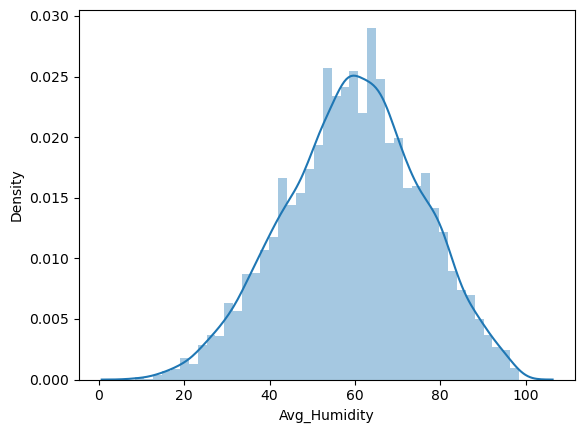

In [56]:
sns.distplot(df['Avg_Humidity'])

<Axes: xlabel='Avg_Pressure', ylabel='Density'>

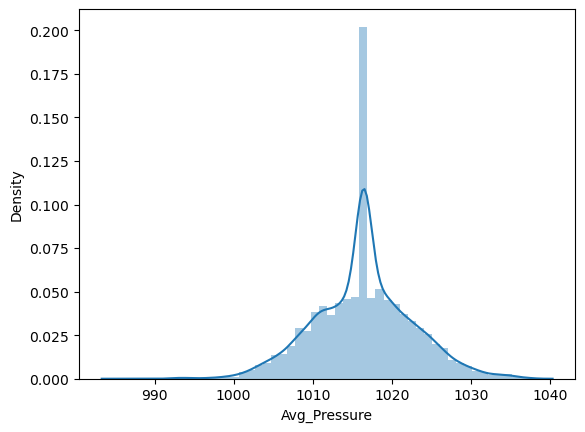

In [57]:
sns.distplot(df['Avg_Pressure'])

<Axes: xlabel='Avg_Temp', ylabel='Density'>

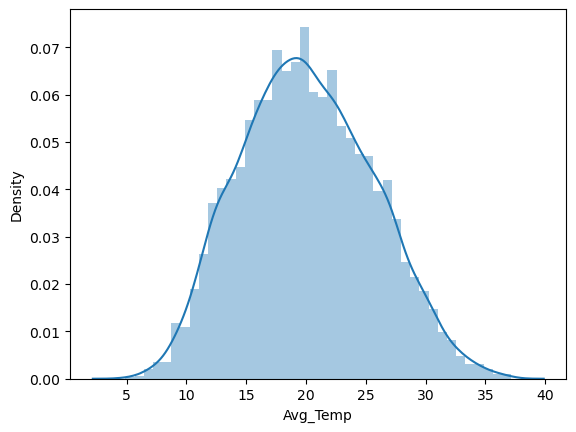

In [58]:
sns.distplot(df['Avg_Temp'])

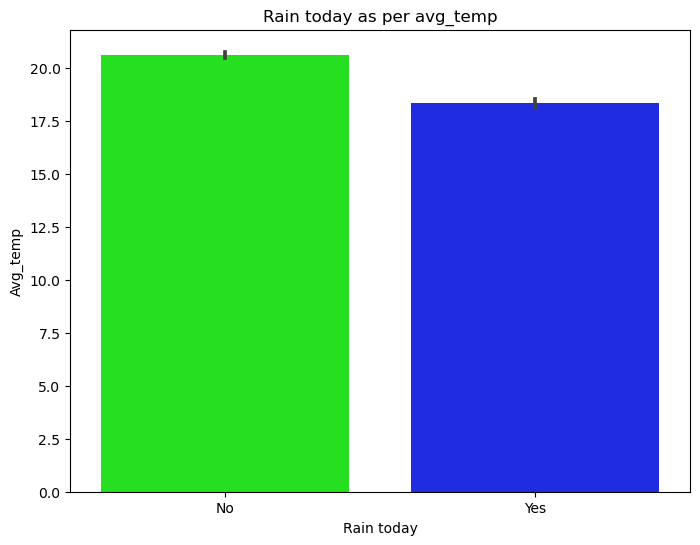

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(x='RainToday', y='Avg_Temp', data=df, palette='hsv')
plt.title('Rain today as per avg_temp')
plt.xlabel('Rain today')
plt.ylabel('Avg_temp')
plt.show()

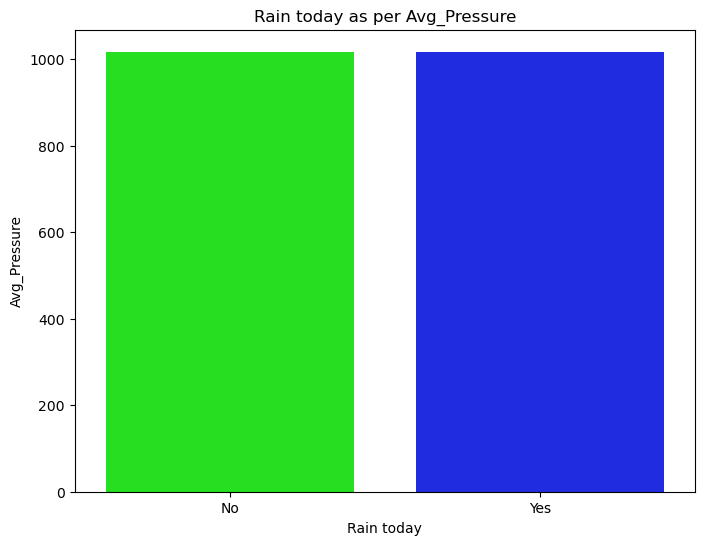

In [63]:
plt.figure(figsize=(8, 6))
sns.barplot(x='RainToday', y='Avg_Pressure', data=df, palette='hsv')
plt.title('Rain today as per Avg_Pressure')
plt.xlabel('Rain today')
plt.ylabel('Avg_Pressure')
plt.show()

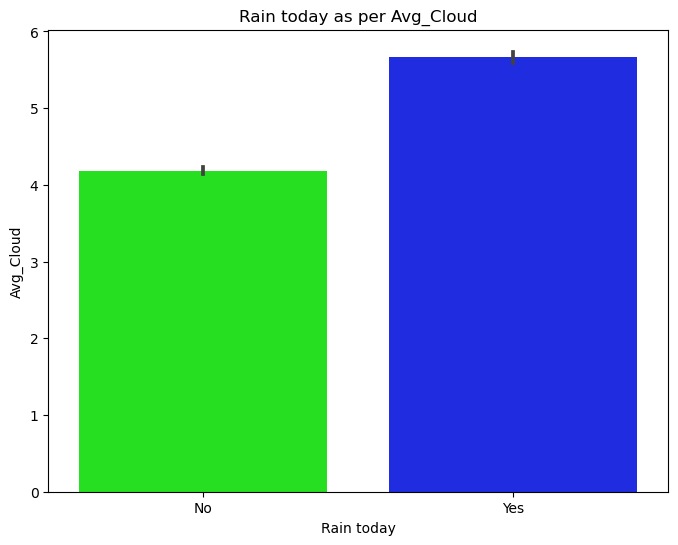

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x='RainToday', y='Avg_Cloud', data=df, palette='hsv')
plt.title('Rain today as per Avg_Cloud')
plt.xlabel('Rain today')
plt.ylabel('Avg_Cloud')
plt.show()

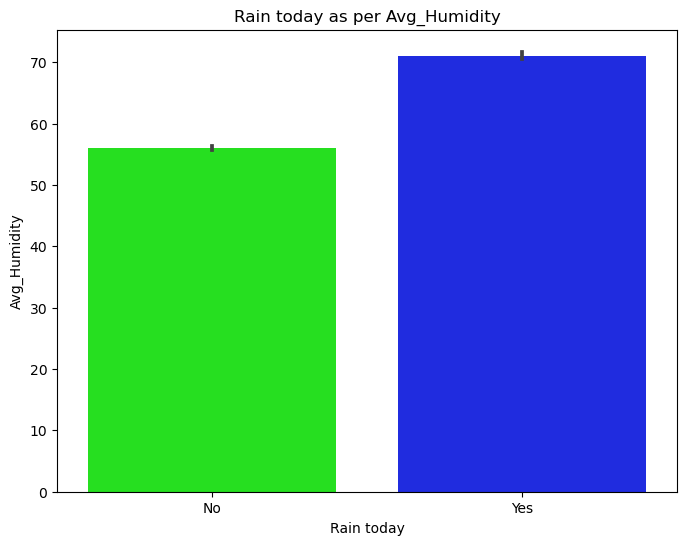

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(x='RainToday', y='Avg_Humidity', data=df, palette='hsv')
plt.title('Rain today as per Avg_Humidity')
plt.xlabel('Rain today')
plt.ylabel('Avg_Humidity')
plt.show()

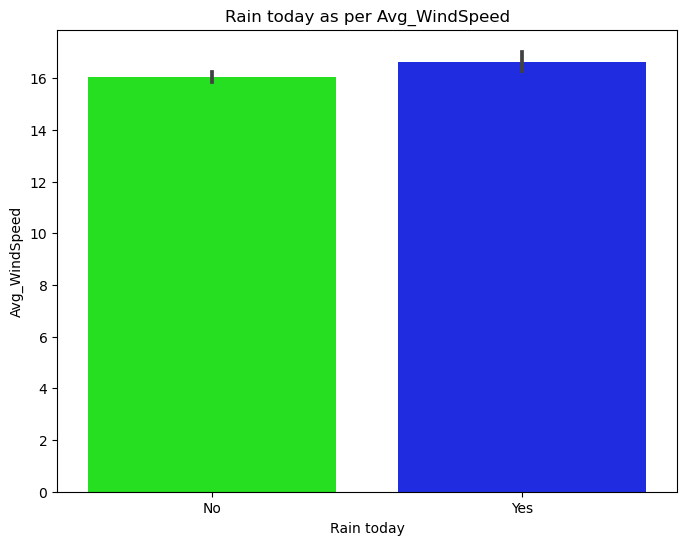

In [66]:
plt.figure(figsize=(8, 6))
sns.barplot(x='RainToday', y='Avg_WindSpeed', data=df, palette='hsv')
plt.title('Rain today as per Avg_WindSpeed')
plt.xlabel('Rain today')
plt.ylabel('Avg_WindSpeed')
plt.show()

## Encoding of Data

In [67]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

category = df.select_dtypes(include=['object']).columns

category

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [68]:
for i in category:
    df[i] = enc.fit_transform(df[i])

In [69]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,0,0,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,0,0,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,0,0,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,0,0,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,0,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


## Outliers Detection and Handling

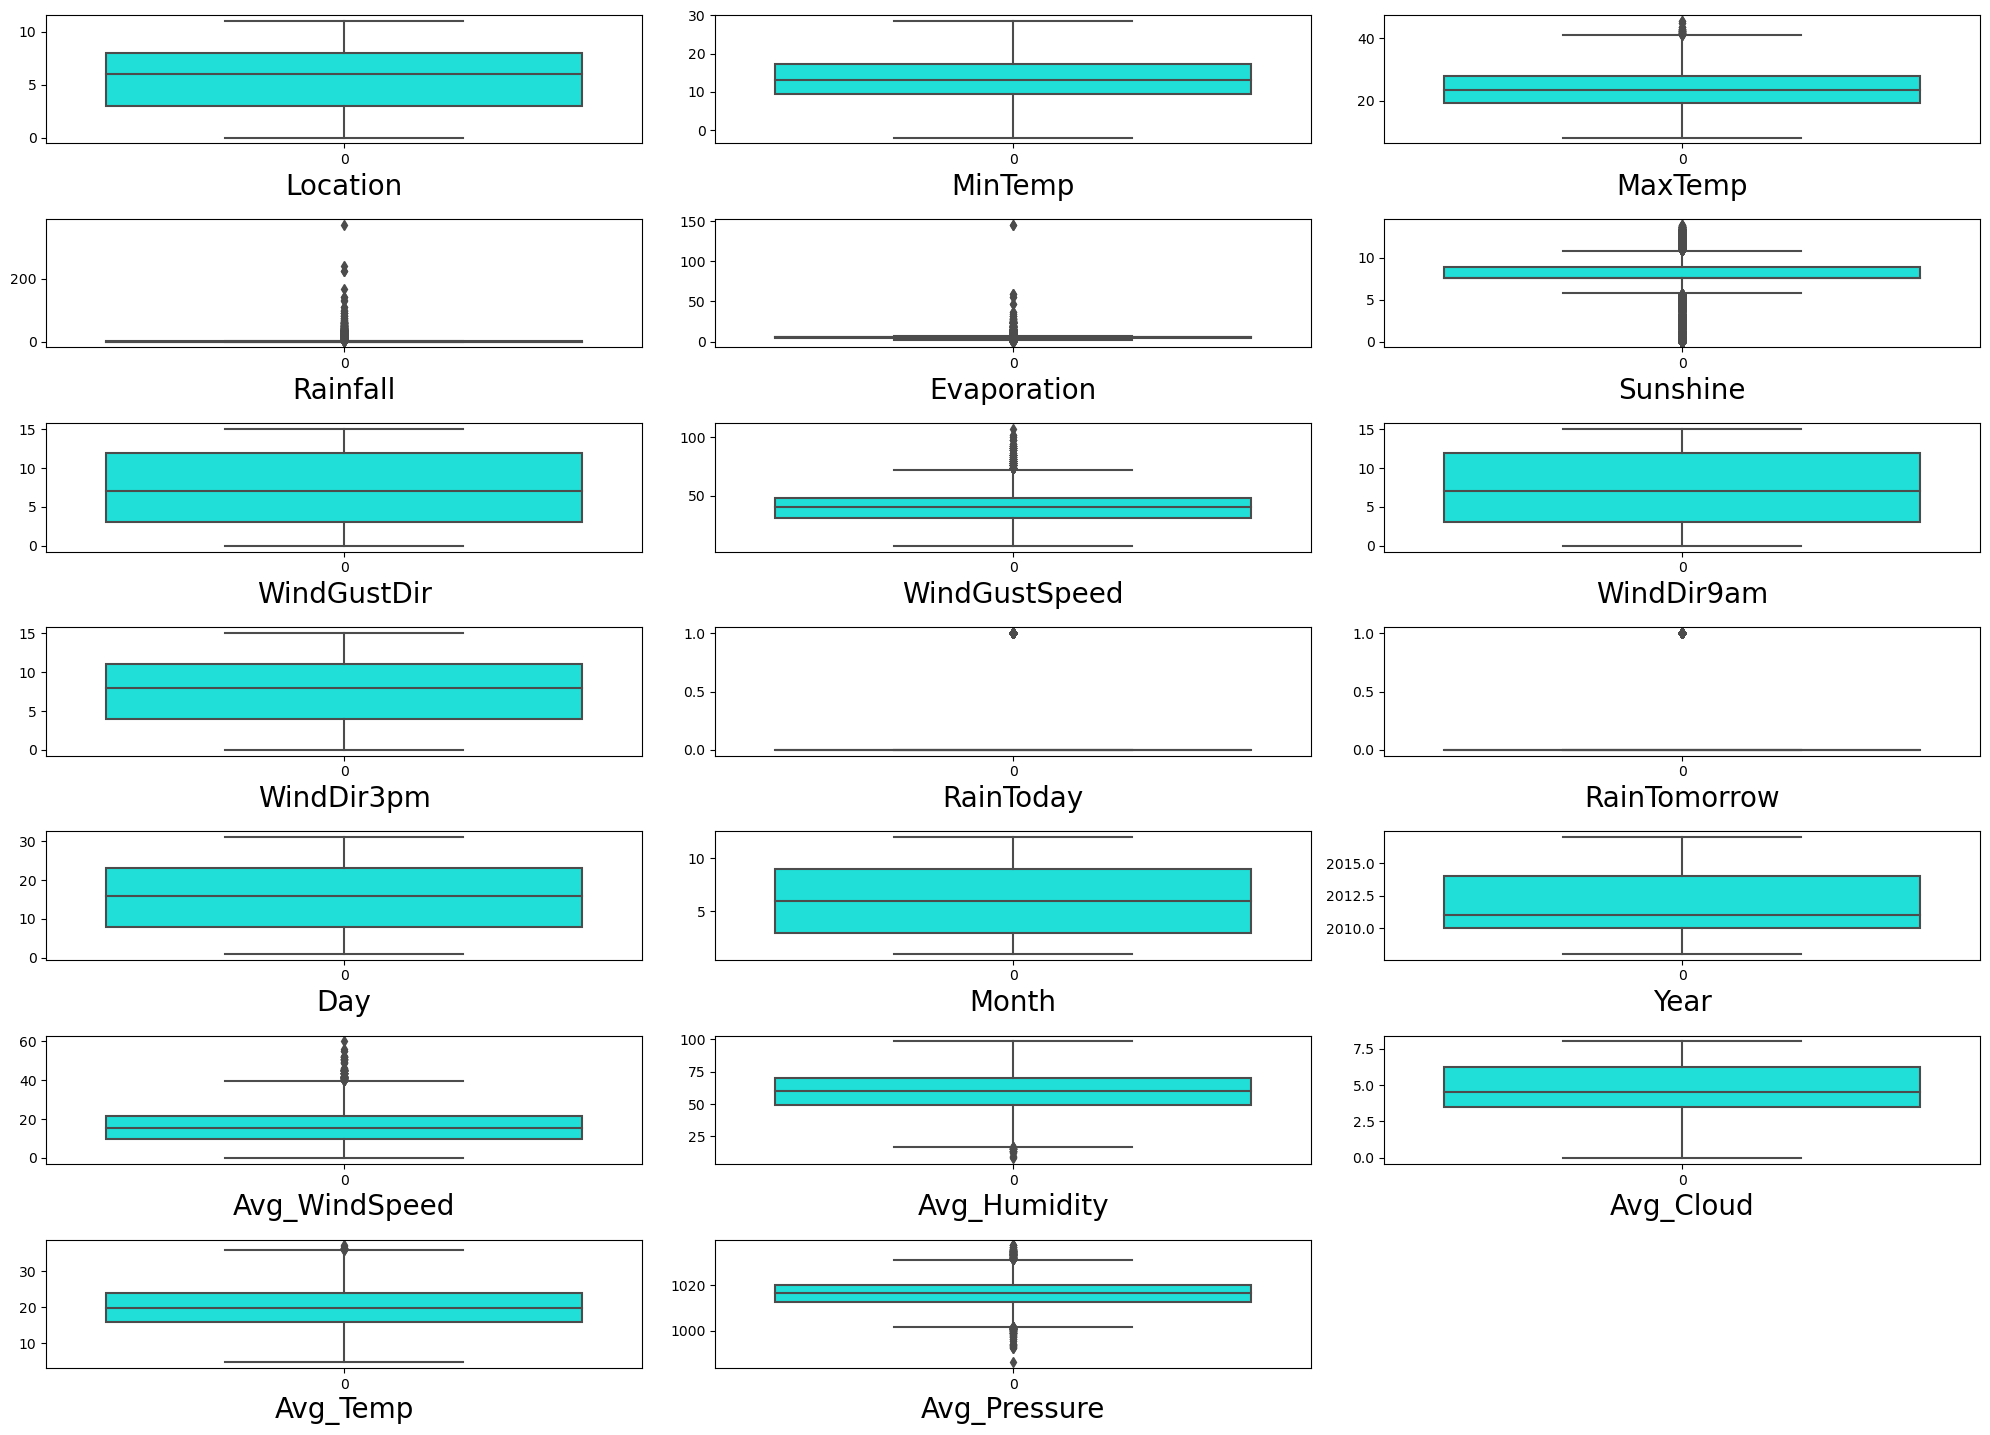

In [70]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=31:
        ax = plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Let's proceed to remove these outliers.

In [71]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3

In [72]:
df=df[(z<3).all(axis = 1)]
df.shape

(8064, 20)

In [73]:
# Lets calculate percentage data loss.
((8425-8064)/8425)*100

4.28486646884273

We have lost only 4% of the data which is in permissible limit. Let's proceed further.

## Skewness Check

In [74]:
df.skew()

Location        -0.040809
MinTemp         -0.083008
MaxTemp          0.331997
Rainfall         3.504638
Evaporation      0.853772
Sunshine        -0.721331
WindGustDir      0.121628
WindGustSpeed    0.507816
WindDir9am       0.169365
WindDir3pm      -0.124306
RainToday        1.306659
RainTomorrow     1.292357
Day              0.000534
Month            0.047265
Year             0.431326
Avg_WindSpeed    0.430396
Avg_Humidity    -0.158005
Avg_Cloud       -0.370482
Avg_Temp         0.142750
Avg_Pressure     0.061896
dtype: float64

Since our skewness value has all positive, negative and zero values, lets use yeo-johnson power transformation method.

In [75]:
# Removing skewness using yeo-johnson method to get better prediction
skew = ['Rainfall','Sunshine','Avg_Cloud','RainToday','WindGustSpeed','MinTemp','Avg_Humidity']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [76]:
df[skew] = scaler.fit_transform(df[skew].values)

In [77]:
df.skew()

Location        -0.040809
MinTemp         -0.103599
MaxTemp          0.331997
Rainfall         0.918392
Evaporation      0.853772
Sunshine        -0.064872
WindGustDir      0.121628
WindGustSpeed    0.002406
WindDir9am       0.169365
WindDir3pm      -0.124306
RainToday        1.306659
RainTomorrow     1.292357
Day              0.000534
Month            0.047265
Year             0.431326
Avg_WindSpeed    0.430396
Avg_Humidity    -0.047515
Avg_Cloud       -0.192031
Avg_Temp         0.142750
Avg_Pressure     0.061896
dtype: float64

For some values we weren't able to remove skewness completely but we reduced them and looks much better than previous one.

# Correlation between Target variable and independent variable

In [78]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
Location,1.000000,0.117208,0.063390,0.024985,0.133349,0.039663,-0.036941,0.252943,-0.041814,-0.030331,0.003070,0.010479,-0.004871,-0.085526,0.478224,0.262379,0.040562,0.041055,0.091969,-0.017092
MinTemp,0.117208,1.000000,0.718836,0.075220,0.373499,0.087989,-0.152108,0.251326,-0.046240,-0.149861,0.059308,0.089423,0.010888,-0.243861,0.039882,0.189878,-0.020364,0.073465,0.820080,-0.435863
MaxTemp,0.063390,0.718836,1.000000,-0.239784,0.471084,0.401575,-0.234396,0.156153,-0.218707,-0.184005,-0.222665,-0.151910,0.017439,-0.161439,0.119375,0.064812,-0.443931,-0.282582,0.962185,-0.378570
Rainfall,0.024985,0.075220,-0.239784,1.000000,-0.195207,-0.266738,0.143031,0.091112,0.157426,0.118687,0.875694,0.316868,-0.023751,0.026010,0.017960,0.049840,0.436194,0.322186,-0.188337,-0.084646
Evaporation,0.133349,0.373499,0.471084,-0.195207,1.000000,0.380109,-0.122106,0.204230,-0.117445,-0.033947,-0.165885,-0.088637,0.014118,-0.052417,0.123137,0.146817,-0.306151,-0.144643,0.469428,-0.270844
Sunshine,0.039663,0.087989,0.401575,-0.266738,0.380109,1.000000,-0.110101,0.032669,-0.082199,-0.072640,-0.222056,-0.314241,0.005761,0.000234,0.023547,0.049797,-0.458668,-0.617938,0.367480,-0.039542
WindGustDir,-0.036941,-0.152108,-0.234396,0.143031,-0.122106,-0.110101,1.000000,-0.001831,0.405457,0.505133,0.122074,0.046754,0.015766,0.033217,-0.095329,0.078928,0.046957,0.116820,-0.224504,-0.052140
WindGustSpeed,0.252943,0.251326,0.156153,0.091112,0.204230,0.032669,-0.001831,1.000000,-0.072282,0.081121,0.073388,0.171920,-0.000538,0.050681,-0.030497,0.685896,-0.199540,0.039550,0.178912,-0.355480
WindDir9am,-0.041814,-0.046240,-0.218707,0.157426,-0.117445,-0.082199,0.405457,-0.072282,1.000000,0.241862,0.149221,0.030414,-0.012819,0.016235,-0.033197,0.069134,0.076262,0.086637,-0.173706,0.041909
WindDir3pm,-0.030331,-0.149861,-0.184005,0.118687,-0.033947,-0.072640,0.505133,0.081121,0.241862,1.000000,0.099475,0.005214,-0.000074,0.030017,-0.009501,0.066234,-0.008943,0.074016,-0.189337,-0.085466


<Axes: >

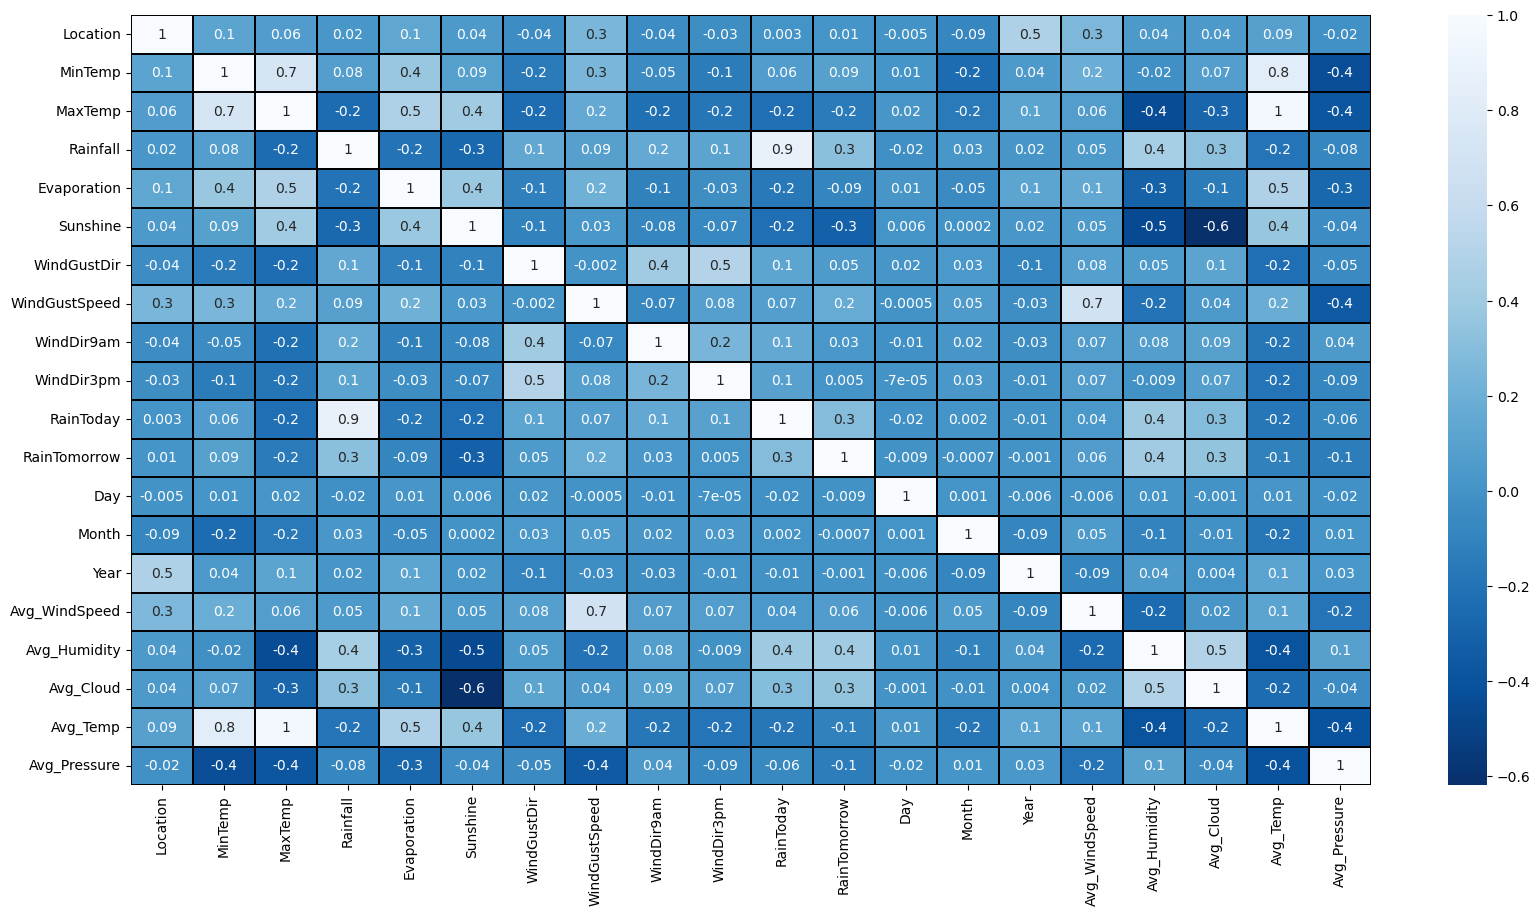

In [79]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

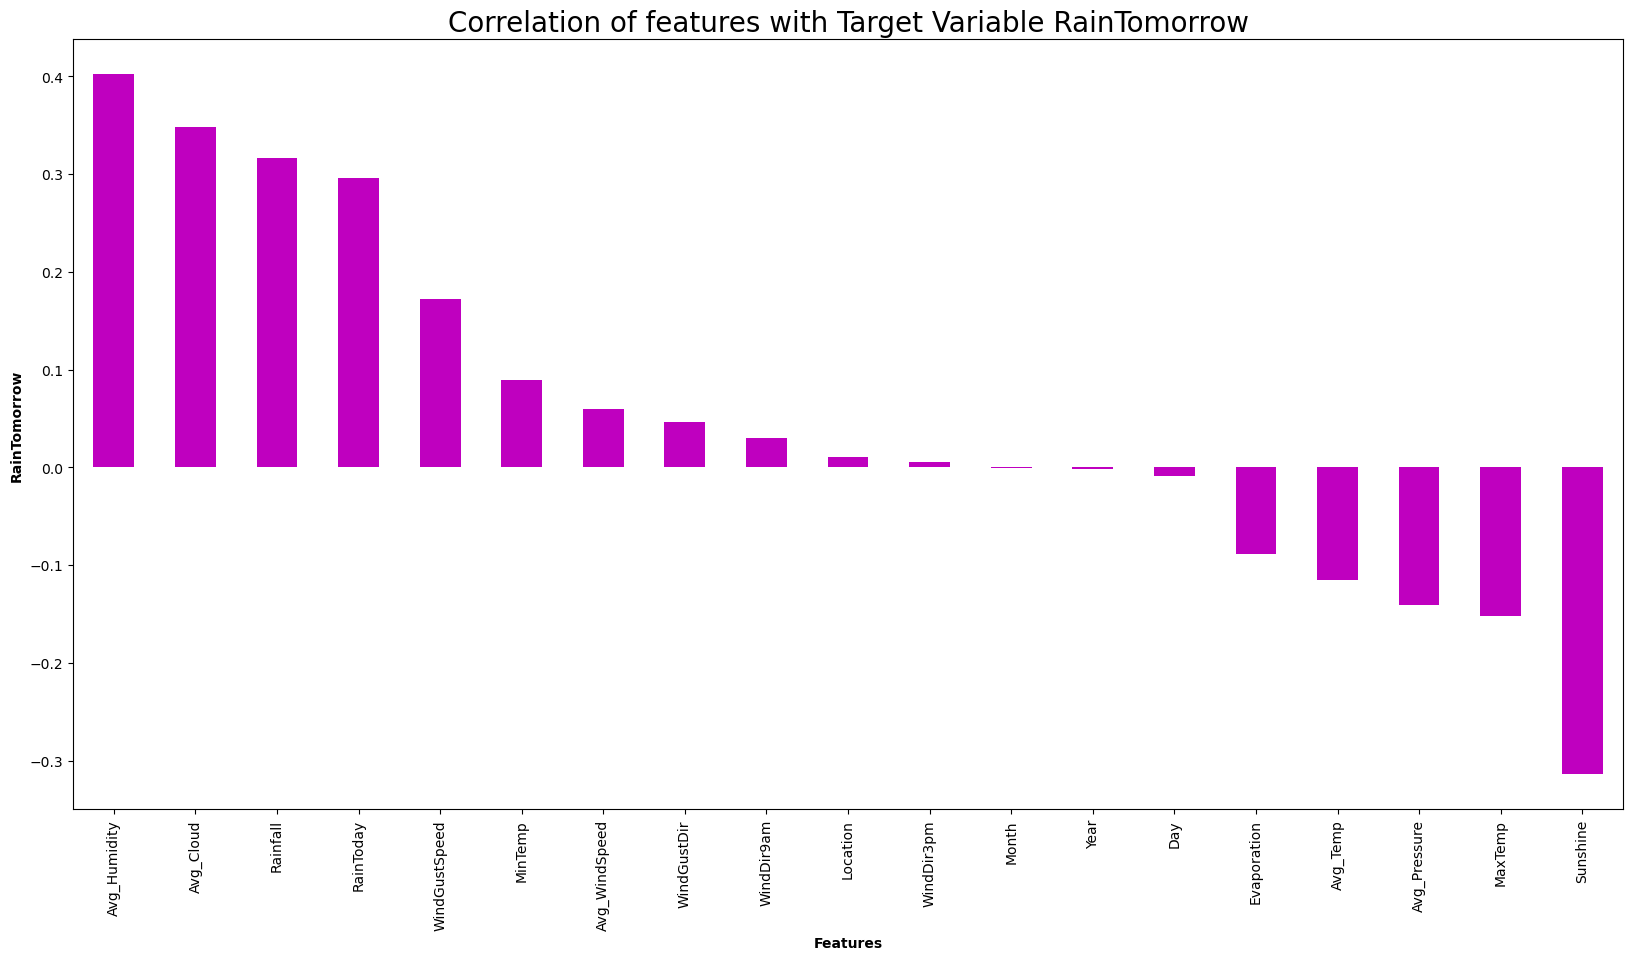

In [80]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize = (20,10))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).sort_values(ascending=False).plot(kind='bar',color = 'm')
plt.xlabel('Features',fontsize=10,fontweight='bold')
plt.ylabel('RainTomorrow',fontsize=10,fontweight='bold')
plt.title('Correlation of features with Target Variable RainTomorrow',fontsize = 20)
plt.show()

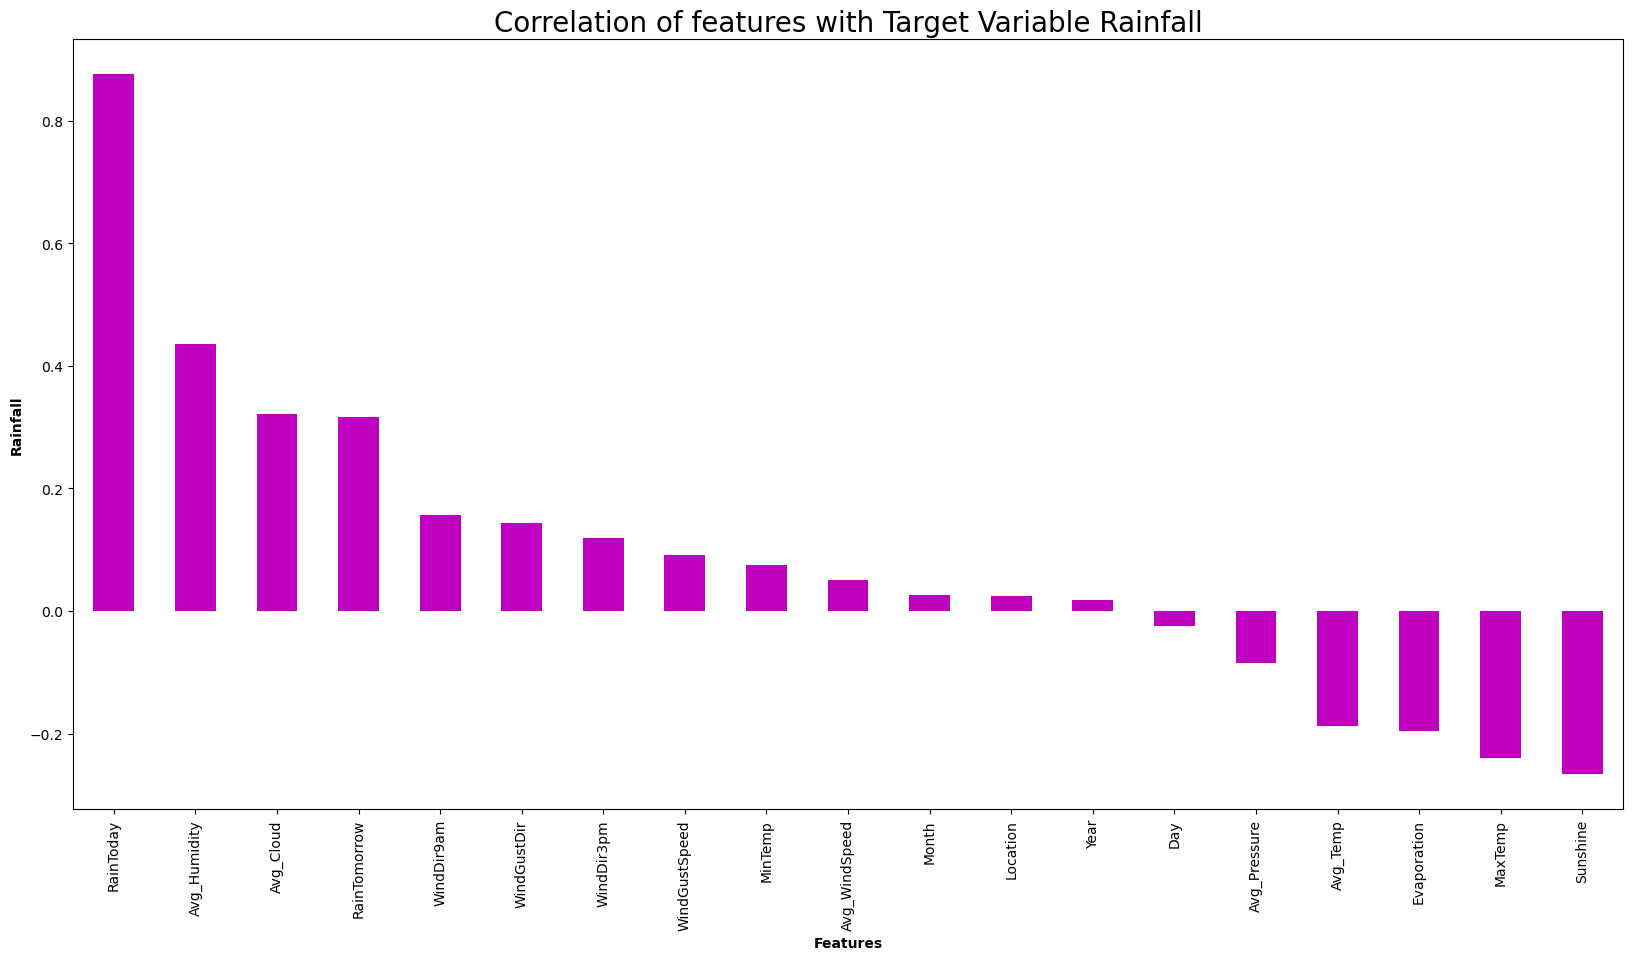

In [81]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize = (20,10))
df.corr()['Rainfall'].drop(['Rainfall']).sort_values(ascending=False).plot(kind='bar',color = 'm')
plt.xlabel('Features',fontsize=10,fontweight='bold')
plt.ylabel('Rainfall',fontsize=10,fontweight='bold')
plt.title('Correlation of features with Target Variable Rainfall',fontsize = 20)
plt.show()

# Model Building for Rain Tomorrow

## Using Standard Scalarization

In [82]:
# Splitting data in target and dependent feature
X = df.drop(['RainTomorrow'], axis =1)
Y = df['RainTomorrow']

In [87]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### Using Variance Inflation Factor

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.556387,Location
1,3.847200,MinTemp
2,4.801589,MaxTemp
3,4.731118,Rainfall
4,1.519620,Evaporation
5,2.000476,Sunshine
6,1.585283,WindGustDir
7,2.246379,WindGustSpeed
8,1.318290,WindDir9am
9,1.416326,WindDir3pm


In [85]:
X = X.drop(['Avg_Temp'], axis=1)

We can clearly observe that, the VIF values have reduced significantly. And as the max VIF value for our dataset is below 10. We are certain that there is no multicollinearity present in the dataset now.

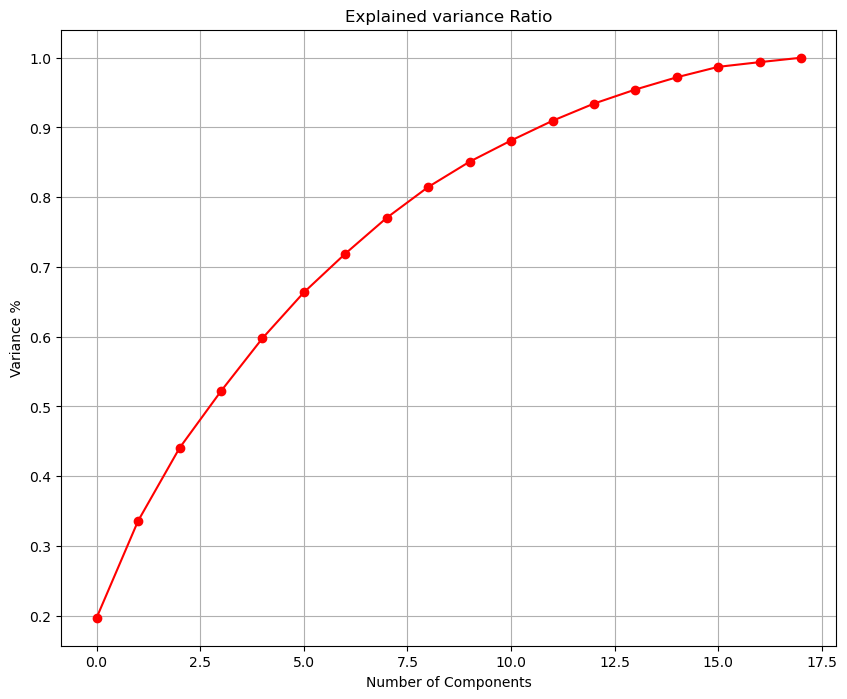

In [89]:
from sklearn.decomposition import PCA                     # Using PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Here we can see that nearly 11 principal components contribute for 90% of the variation in our data. Lets consider taking 11 components for our analysis.

In [90]:
pca_new = PCA(n_components=11)
x_new = pca_new.fit_transform(X_scale)

In [91]:
Principle_x=pd.DataFrame(x_new,columns=np.arange(11))

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (6048, 11)
Training target size: (6048,)
Test feature size: (2016, 11)
Test target size: (2016,)


## Finding Best Random State

In [94]:
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(Principle_x,Y,test_size = 0.25, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8323412698412699 on Random_state 141


In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=141, test_size=.25)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')

accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy: 0.8323412698412699
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1576
           1       0.68      0.44      0.54       440

    accuracy                           0.83      2016
   macro avg       0.77      0.69      0.72      2016
weighted avg       0.82      0.83      0.82      2016



In [96]:
model=[ 
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    accuracy = accuracy_score(Y_test, y_pred)
    print('Accuracy:', accuracy)

    print('Classification Report:')
    print(classification_report(Y_test, y_pred))

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy: 0.8412698412698413
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1576
           1       0.73      0.43      0.54       440

    accuracy                           0.84      2016
   macro avg       0.80      0.69      0.72      2016
weighted avg       0.83      0.84      0.82      2016

Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy: 0.8293650793650794
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1576
           1       0.60      0.65      0.62       440

    accuracy                           0.83      2016
   macro avg       0.75      0.76      0.76      2016
weighted avg       0.83      0.83      0.83      2016

Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy: 0.8874007936507936
Clas

## Cross Validation Score

In [97]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, Principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print('\n')
    print('============================================================')



Cross Validation Score LogisticRegression() :

Score : [0.83942963 0.7867328  0.74147551 0.80347179 0.83622829]
Mean Score : 0.8014676042514373




Cross Validation Score SVC() :

Score : [0.8133912  0.79107254 0.7916925  0.81401116 0.81389578]
Mean Score : 0.804812634318864




Cross Validation Score DecisionTreeClassifier() :

Score : [0.73217607 0.79603224 0.81029138 0.78921265 0.75496278]
Mean Score : 0.7765350232832183




Cross Validation Score RandomForestClassifier() :

Score : [0.81773094 0.83508989 0.87352759 0.84748915 0.82382134]
Mean Score : 0.8395317819392375




Cross Validation Score ExtraTreesClassifier() :

Score : [0.80967142 0.83508989 0.87476751 0.84562926 0.82320099]
Mean Score : 0.8376718166140801




Both Extra Tree Classifier and Random Forest Classifier are looking good but Random Forest Classifier has slightly bit more Accuracy score and mean score (cross val score) than Extra Tree Classifier hence considering Random Forest Classifier.

# Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameters = { 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [100]:
GSCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,n_jobs = -1)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]})

In [101]:
GSCV.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 100}

## Final Model

In [102]:
Final_mod = RandomForestClassifier(criterion='gini',n_estimators= 100, max_depth=None ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.8834325396825397


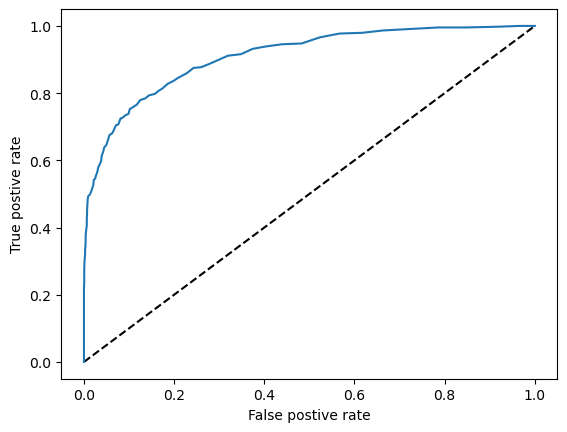


Auc Score :
 0.7739097831102908


In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\n[1m'+'Auc Score :'+'\033[0m\n',auc_score)

In [104]:
# Saving Model
import joblib
joblib.dump(Final_mod,'Prediction_RainTomorrow_Project.pkl')

['Prediction_RainTomorrow_Project.pkl']

# Model building for Rainfall

In [105]:
# Splitting data in target and dependent feature
X = df.drop(['Rainfall'], axis =1)
Y = df['Rainfall']

In [109]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Using Variance Inflation Factor

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.564077,Location
1,3.814826,MinTemp
2,4.787138,MaxTemp
3,1.509117,Evaporation
4,2.015960,Sunshine
5,1.584186,WindGustDir
6,2.311848,WindGustSpeed
7,1.318195,WindDir9am
8,1.418340,WindDir3pm
9,1.311722,RainToday


In [108]:
X = X.drop(['Avg_Temp'], axis=1)

All the vif values are within the permissible range, lets proceed further.

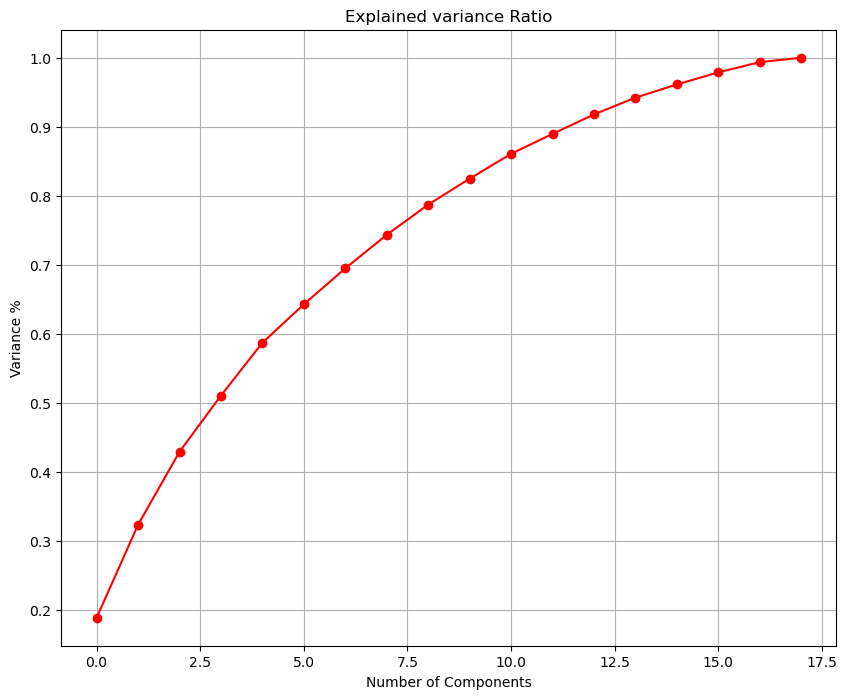

In [111]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

According to the graph, nearly 11 principal components contribute for 90% of variation in the data. Lets consider these 11 features for our analysis.

In [112]:
pca_new = PCA(n_components=11)
x_new = pca_new.fit_transform(X_scale)

In [113]:
Principle_x=pd.DataFrame(x_new,columns=np.arange(11))

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [115]:
X_train, X_test, Y_train, Y_test = train_test_split(Principle_x, Y, random_state=70, test_size=.25)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (6048, 11)
Training target size: (6048,)
Test feature size: (2016, 11)
Test target size: (2016,)


### Finding Best Random State

In [116]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8163882521793249 on Random_state 130


# Linear Regression Model

In [117]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=130, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [-0.42287837 -0.51969028 -0.46137677 ...  1.91476454 -0.40212692
 -0.49870468]


Actual Wins:
 4548   -0.691594
594    -0.691594
3624   -0.691594
3281    1.730526
1825   -0.691594
          ...   
5725    1.636263
7826    1.526202
5896    1.590804
4093    1.526967
1984   -0.691594
Name: Rainfall, Length: 2016, dtype: float64


In [118]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))

print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')

print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.28664414006057765
Mean squared error : 0.17648131296470138
Root Mean Squared Error: 0.42009678999571204


 R2 Score :
0.8163882521793249


In [119]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7804369200932936


In [120]:
from sklearn.ensemble import BaggingRegressor

In [121]:
RFR = RandomForestRegressor()
RFR.fit(X_train, Y_train)
pred_RFR = RFR.predict(X_test)
pred_train = RFR.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_RFR))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_RFR))
print("Mean squared error: ",mean_squared_error(Y_test, pred_RFR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_RFR)))

R2_score:  0.9021737415774282
R2_score on training data:  98.33910626219227
Mean Absolute Error:  0.20145236515468692
Mean squared error:  0.09402724353836585
Root Mean Squared Error:  0.30663862042861767


In [122]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, Y_train)
pred_dtc = dtc.predict(X_test)
pred_train = dtc.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_dtc))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_dtc))
print("Mean squared error: ",mean_squared_error(Y_test, pred_dtc))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_dtc)))

R2_score:  0.7767737808869649
R2_score on training data:  100.0
Mean Absolute Error:  0.18931921673606703
Mean squared error:  0.2145573837448027
Root Mean Squared Error:  0.4632033934944807


In [123]:
XT = ExtraTreesRegressor()
XT.fit(X_train, Y_train)
pred_XT = XT.predict(X_test)
pred_train = XT.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_XT))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_XT))
print("Mean squared error: ",mean_squared_error(Y_test, pred_XT))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_XT)))

R2_score:  0.912671063390665
R2_score on training data:  100.0
Mean Absolute Error:  0.16388313716509362
Mean squared error:  0.08393757793580135
Root Mean Squared Error:  0.28971982661840967


In [124]:
BR = BaggingRegressor()
BR.fit(X_train, Y_train)
pred_BR = BR.predict(X_test)
pred_train = BR.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_BR))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_BR))
print("Mean squared error: ",mean_squared_error(Y_test, pred_BR))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_BR)))

R2_score:  0.8894956888812199
R2_score on training data:  97.48080193954173
Mean Absolute Error:  0.2027478273704043
Mean squared error:  0.10621295285282498
Root Mean Squared Error:  0.32590328757596937


In [125]:
adb=AdaBoostRegressor()
adb.fit(X_train, Y_train)
pred_adb = adb.predict(X_test)
pred_train = adb.predict(X_train)
print('R2_score: ', r2_score(Y_test, pred_adb))
print('R2_score on training data: ',r2_score(Y_train, pred_train)*100)
print("Mean Absolute Error: ",mean_absolute_error(Y_test, pred_adb))
print("Mean squared error: ",mean_squared_error(Y_test, pred_adb))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test, pred_adb)))

R2_score:  0.750095445715
R2_score on training data:  74.62392430961768
Mean Absolute Error:  0.386919345595259
Mean squared error:  0.24019968427700536
Root Mean Squared Error:  0.49010170809435605


## Cross Validation Score

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
score = cross_val_score(lin_reg,X_scale,Y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,y_pred) - score.mean())*100)

[0.86338163 0.7519484  0.77120399 0.6672609  0.8708292 ]
0.7849248237066437
Difference between R2 score and cross validation score is-  3.146342847268113


In [128]:
score_1 = cross_val_score(RFR,X_scale,Y,cv=5,scoring='r2')
print(score_1)
print(score_1.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_RFR) - score_1.mean())*100)

[0.8428733  0.84262996 0.88492429 0.71708075 0.82060722]
0.8216231035106126
Difference between R2 score and cross validation score is-  8.055063806681561


In [129]:
score_2 = cross_val_score(dtc,X_scale,Y,cv=5,scoring='r2')
print(score_2)
print(score_2.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_dtc) - score_2.mean())*100)

[0.63779913 0.65337442 0.79417377 0.58343966 0.41343511]
0.6164444168032631
Difference between R2 score and cross validation score is-  16.03293640837018


In [130]:
score_3 = cross_val_score(XT,X_scale,Y,cv=5,scoring='r2')
print(score_3)
print(score_3.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_XT) - score_3.mean())*100)

[0.85298221 0.85819364 0.91512625 0.72927767 0.83204848]
0.8375256490855273
Difference between R2 score and cross validation score is-  7.514541430513766


In [131]:
score_4 = cross_val_score(BR,X_scale,Y,cv=5,scoring='r2')
print(score_4)
print(score_4.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_BR) - score_4.mean())*100)

[0.83102365 0.82296663 0.8760829  0.71134021 0.7892364 ]
0.8061299587852042
Difference between R2 score and cross validation score is-  8.336573009601567


In [132]:
score_5 = cross_val_score(adb,X_scale,Y,cv=5,scoring='r2')
print(score_5)
print(score_5.mean())
print("Difference between R2 score and cross validation score is- ", (r2_score(Y_test,pred_adb) - score_5.mean())*100)

[0.77960438 0.70664321 0.69463327 0.66402673 0.67877059]
0.7047356369402527
Difference between R2 score and cross validation score is-  4.535980877474732


According to above analysis,The R2 score of Random forest regressor  and Extra tree regressor tends to be showing good results. Also although the difference in the scores is more than that of extra tree regressor  but it has good scores and values than other. So considering it to be our final model.

# Hyperparameter Tuning

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [135]:
# Create GridSearchCV object
GSCV = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, n_jobs=-1)

In [136]:
# Fit the GridSearchCV object to the training data
GSCV.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [137]:
GSCV.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

## Final Model

In [138]:
from sklearn.ensemble import RandomForestRegressor
Final_model =  RandomForestRegressor(n_estimators=100 , max_depth= None, max_features = 'log2',
             min_samples_leaf = 1, min_samples_split = 2)
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,pred_RFR))
print('Mean squared error :', mean_squared_error(Y_test,pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,pred_RFR)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,pred_RFR)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.20145236515468692
Mean squared error : 0.09402724353836585
Root Mean Squared Error: 0.30663862042861767


 R2 Score of Final Model :
0.9021737415774282




 True Values Vs Predicted Value plot :


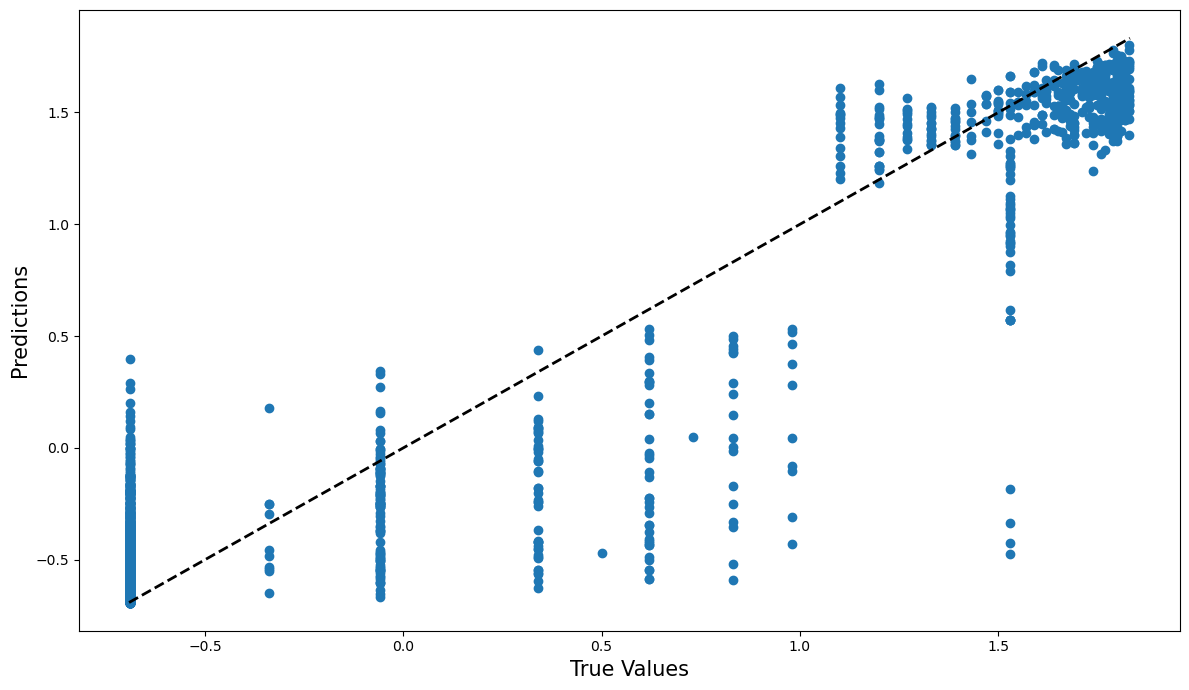

In [139]:
plt.figure(figsize=(12, 7))
y_pred = Final_model.predict(X_test)
plt.scatter(Y_test.round(2), y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)  # Plot the diagonal line
print('\033[1m' + ' True Values Vs Predicted Value plot :' + '\033[0m')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()
plt.show()

In [140]:
import joblib
joblib.dump(Final_model,'Amount_of_Rainfall_Analysis_Model.pkl')

['Amount_of_Rainfall_Analysis_Model.pkl']